In [1]:
#pembagian tugas finalproject kecerdasan buatan B081
#safiqur rohman  = membuat program dan membuat laporan
#Muhammad Iqbal Al Afgany = membuat program dan membuat laporan

import pandas as pd
import matplotlib.pyplot as plt

dataFrame = pd.read_excel("bengkel.xlsx")
dataFrame.head(20)

,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
5,6,59,10
6,7,61,8
7,8,30,10
8,9,45,1
9,10,36,9


In [2]:

# fungsi linguistik
def fuzzyLinguistik(x, point):
    # jika point berada didepan dan dibelakang grafik
    if x < point[0] or x > point[3]:
        return 0
    
    # jika point berada ditengah grafik
    elif x >= point[1] and x <= point[2]:
        return 1
    
    # jika point berada di 1/4 grafik kiri
    elif x >= point[0] and x < point[1]:
        return (x - point[0]) / (point[1] - point[0])
    
    # jika point berada di 1/4 grafik kanan
    elif x >= point[2] and x < point[3]:
        return (point[3] - x) / (point[3] - point[2])

    return 0

# fungsi membership
def fuzzyMembership(x, keanggotaan):
    result = {}

    # Mencari nilai fuzzy untuk masing-masing linguistik dalam Membership
    for ling in keanggotaan:
        result[ling] = fuzzyLinguistik(x, keanggotaan[ling])
        print(result)
    return result

# proses fuzzifikasi
def fuzzyfication(x, list_keanggotaan):

    fuzzyfication = []
    
    # menghitung nilai fuzzy dari member yang dibuat
    for i in range(len(list_keanggotaan)):
        fuzzyfication.append(fuzzyMembership(x[i], list_keanggotaan[i]))

    return fuzzyfication

In [3]:
def plotLinguistik(point, warna, label='', min=0, max=1):
    # set nilai y 
    y = [0, 1, 1, 0]

    # plot garis pertama
    plt.plot([min, point[0]], [0, 0], warna)
    
    # plot garis antara garis pertama dan terakhir
    for i in range(len(point) - 1):
        plt.plot([point[i], point[i + 1]], [y[i], y[i + 1]], warna)
    
    # plot garis terakhir
    plt.plot([point[3], max], [0, 0], warna, label=label)

def linguistikGraph(membership, min=0, max=1):
    colors = ['b', 'g', 'r', 'y']

    # Plot masing-masing linguistik
    i = 0
    for ling in membership:
        plotLinguistik(membership[ling], colors[i], ling, min=min, max=max)
        i += 1
    
    plt.legend(loc=4)
    plt.show()
     

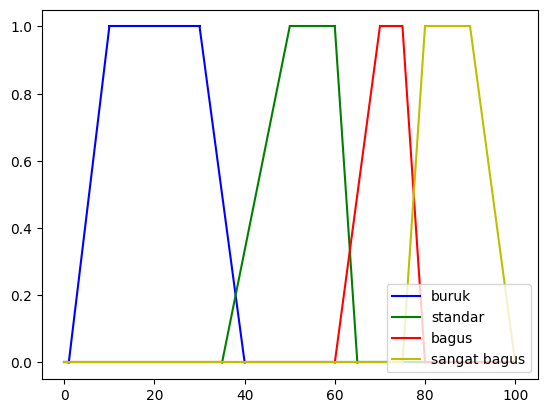

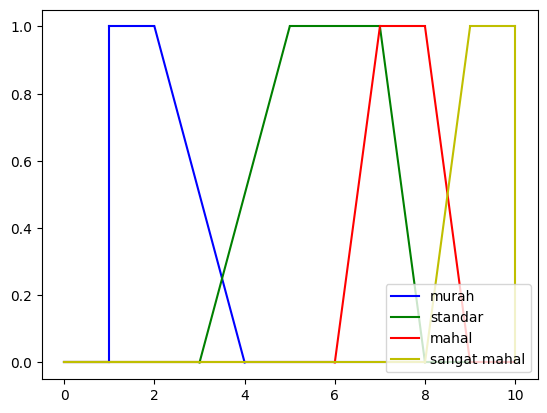

In [4]:
# Linguistik value harga
harga = {
    'murah'   : [1, 1, 2, 4],
    'standar' : [3, 5, 7, 8],
    'mahal'   : [6, 7, 8, 9],
    'sangat mahal' : [8, 9 , 10 , 10]
}

# Linguistik value pelayanan
pelayanan = {
    'buruk'   : [ 1, 10, 30, 40],
    'standar' : [ 35, 50, 60, 65],
    'bagus'   : [60, 70, 75, 80],
    'sangat bagus'  : [75, 80, 90, 100]
}

linguistikGraph(pelayanan, max=100)
linguistikGraph(harga, max=10)

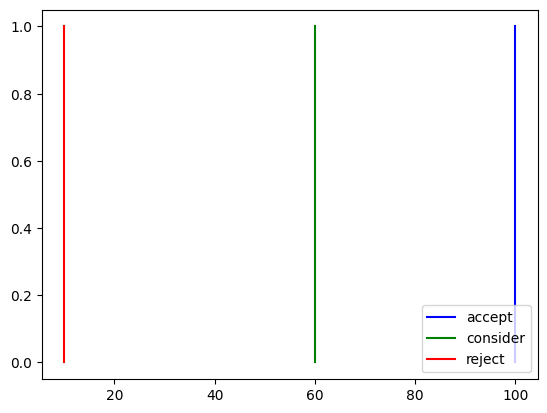

In [5]:
# aturan inferensi (pelayanan, harga)
rule = {
    ('buruk' , 'murah')   : 'reject',
    ('buruk' , 'mahal')  : 'reject',
    ('buruk' , 'standar') : 'reject',
    ('buruk' , 'sangat mahal')  : 'reject',
    ('standar' , 'murah')  : 'accept',
    ('standar' , 'standar')   : 'consider',
    ('standar' , 'mahal')  : 'reject',
    ('standar' , 'sangat mahal')  : 'reject',
    ('bagus' , 'murah')    : 'accept',
    ('bagus' , 'standar')  : 'accept',
    ('bagus' , 'mahal')  : 'consider',
    ('bagus' , 'sangat mahal')  : 'consider',
    ('sangat bagus' , 'standar')    : 'accept',
    ('sangat bagus' , 'murah')    : 'accept',
    ('sangat bagus' , 'mahal')  : 'accept',
    ('sangat bagus' , 'sangat mahal')  : 'consider',
}

# Membership Sugeno
accept_sugeno = {'accept':100, 'consider':60, 'reject':10}

# Plot Membership Sugeno
colors = 'bgry'
for key, val in accept_sugeno.items():
    plt.plot([val, val], [0, 1], colors[0], label=key )
    colors = colors[1:]
plt.legend(loc=4)

plt.show()

def inferensi(nilai_fuzzy, rule):  
    inferenceData = {}
    # loop nilai linguistik untuk membuat inference
    for l1, v1 in nilai_fuzzy[0].items():
        for l2, v2 in nilai_fuzzy[1].items():

            r, min_value = (l1, l2), min(v1, v2)
            
            # lihat nilai yang sudah didapat pada hasil
            current_value = inferenceData.get(rule[r], 0)
            
            # replace nilai hasil apabila current value lebih kecil
            inferenceData[rule[r]] = max(min_value, current_value)

    return inferenceData

In [8]:

def sugenoDeffuzyfication(x_infer, membership):
    num, den = 0, 0

    # rumus defuzzification model sugeno
    for ling in membership:
        num += x_infer[ling] * membership[ling]
        den += x_infer[ling]
  
    if den > 0 :
      return num / den

# fuzzyfication
inference = []
skor = []

for x in dataFrame.drop('id', axis=1).values:
    x_fuzzy = fuzzyfication(x, [pelayanan, harga])
    x_infer = inferensi(x_fuzzy, rule)

    # penghitungan skor
    x_defuz = sugenoDeffuzyfication(x_infer, accept_sugeno)
    
    skor.append(x_defuz)
    inference.append(x_infer)

# membuat data frame untuk skor dan inference
dataFrame['Skor'] = skor
print(inference)
dataFrame['Infer'] = inference

# Mencari 10 restoran terbaik
dataFrame_top_twenty = dataFrame.sort_values(by='Skor', ascending=False)[:20]
dataFrame_other = dataFrame.drop(dataFrame_top_ten.index)

{'buruk': 0}
{'buruk': 0, 'standar': 1}
{'buruk': 0, 'standar': 1, 'bagus': 0}
{'buruk': 0, 'standar': 1, 'bagus': 0, 'sangat bagus': 0}
{'murah': 0}
{'murah': 0, 'standar': 1}
{'murah': 0, 'standar': 1, 'mahal': 1}
{'murah': 0, 'standar': 1, 'mahal': 1, 'sangat mahal': 0}
{'buruk': 0}
{'buruk': 0, 'standar': 1}
{'buruk': 0, 'standar': 1, 'bagus': 0}
{'buruk': 0, 'standar': 1, 'bagus': 0, 'sangat bagus': 0}
{'murah': 1}
{'murah': 1, 'standar': 0}
{'murah': 1, 'standar': 0, 'mahal': 0}
{'murah': 1, 'standar': 0, 'mahal': 0, 'sangat mahal': 0}
{'buruk': 0}
{'buruk': 0, 'standar': 0}
{'buruk': 0, 'standar': 0, 'bagus': 0}
{'buruk': 0, 'standar': 0, 'bagus': 0, 'sangat bagus': 0.2}
{'murah': 1}
{'murah': 1, 'standar': 0}
{'murah': 1, 'standar': 0, 'mahal': 0}
{'murah': 1, 'standar': 0, 'mahal': 0, 'sangat mahal': 0}
{'buruk': 0}
{'buruk': 0, 'standar': 1}
{'buruk': 0, 'standar': 1, 'bagus': 0}
{'buruk': 0, 'standar': 1, 'bagus': 0, 'sangat bagus': 0}
{'murah': 0}
{'murah': 0, 'standar': 0.

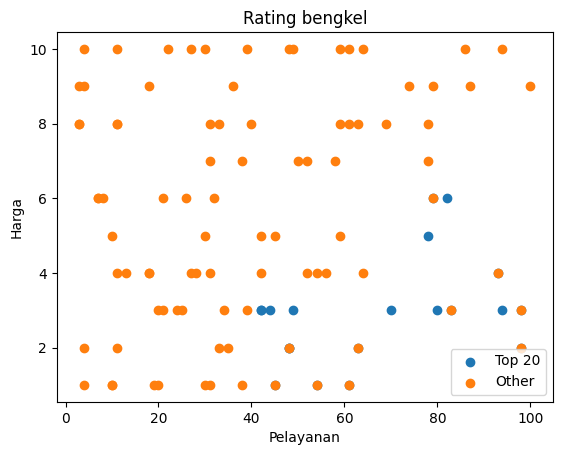

In [9]:
# Plot bengktel 10 terbaik
plt.scatter(dataFrame_top_twenty.servis,
            dataFrame_top_twenty.harga,
            label='Top 20')
plt.scatter(dataFrame_other.servis,
            dataFrame_other.harga,
            label='Other')

plt.xlabel('Pelayanan')
plt.ylabel('Harga')
plt.title('Rating bengkel')
plt.legend(loc='lower right')

plt.show()

In [10]:
# Menampilkan 20 data bengkel terbaik
dataFrame_top_twenty

,id,servis,harga,Skor,Infer
55,56,49,3,100.0,"{'reject': 0, 'accept': 0.5, 'consider': 0}"
20,21,48,2,100.0,"{'reject': 0, 'accept': 0.8666666666666667, 'c..."
18,19,42,3,100.0,"{'reject': 0, 'accept': 0.4666666666666667, 'c..."
27,28,44,3,100.0,"{'reject': 0, 'accept': 0.5, 'consider': 0}"
16,17,70,3,100.0,"{'reject': 0, 'accept': 0.5, 'consider': 0}"
15,16,82,6,100.0,"{'reject': 0, 'accept': 1, 'consider': 0}"
14,15,78,5,100.0,"{'reject': 0, 'accept': 0.6, 'consider': 0}"
31,32,42,3,100.0,"{'reject': 0, 'accept': 0.4666666666666667, 'c..."
12,13,80,3,100.0,"{'reject': 0, 'accept': 0.5, 'consider': 0}"
51,52,94,3,100.0,"{'reject': 0, 'accept': 0.5, 'consider': 0}"


In [14]:
dataFrame_top_twenty.to_csv("Top 20 Bengkel.csv")
dataFrame_top_twenty.to_excel('peringkat 10 bengkel.xlsx', index=False)